In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Using TensorFlow backend.


11501568/11490434 [==============================] - 1s 0us/step


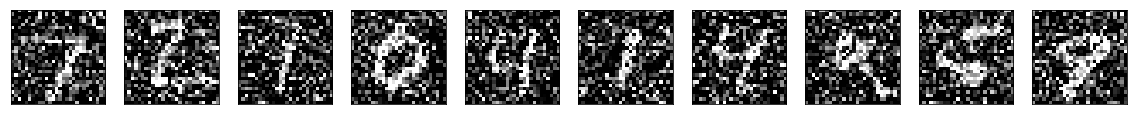

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# None, 28, 28, 32
x = MaxPooling2D((2, 2), padding='same')(x)
# None, 14, 14, 32
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# None, 14, 14, 32
encoded = MaxPooling2D((2, 2), padding='same')(x)
# None, 7, 7, 32

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
# None, 7, 7, 32
x = UpSampling2D((2, 2))(x)
# None, 14, ,14 32
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# None, 14, 14, 32
x = UpSampling2D((2, 2))(x)
# None, 28, 28, 32
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# None, 28, 28, 1

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0930 01:47:45.174689 139954832963456 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 01:47:45.226243 139954832963456 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 01:47:45.239465 139954832963456 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 01:47:45.268470 139954832963456 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0930 01:47:45.302292 139954832963456 deprecation_wrapp

In [0]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

W0930 01:47:56.191632 139954832963456 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 236us/step - loss: 0.1805 - val_loss: 0.1262
Epoch 2/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1213 - val_loss: 0.1148
Epoch 3/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1131 - val_loss: 0.1119
Epoch 4/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.1089 - val_loss: 0.1060
Epoch 5/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1061 - val_loss: 0.1029
Epoch 6/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.1042 - val_loss: 0.1018
Epoch 7/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1029 - val_loss: 0.1040
Epoch 8/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1022 - val_loss: 0.1019
Epoch 9/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.1015 - val_loss: 0.

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

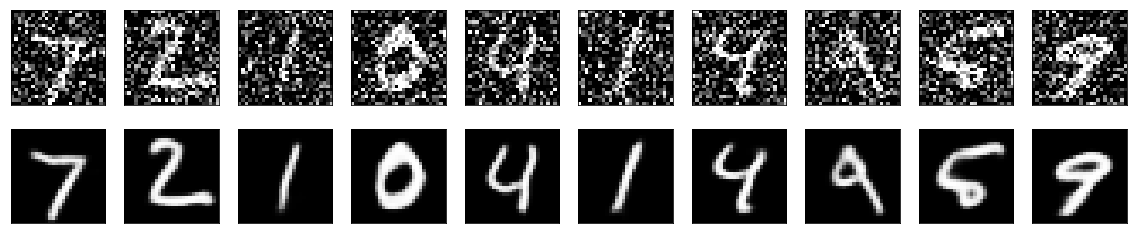

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()